# Mintun1984Model for Image-Derived Input Functions and Twilite Data

## Setup

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from IOImplementations import BaseIO
from Mintun1984Model import Mintun1984Model
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# define data & models
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
#petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
#idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

# most reasonable fit from:  truths=[0.5, 0.245, 0.775, 5.6, -15, 0.05]
mm_twil = Mintun1984Model(twil, 
                     pet,
                     truths=[0.47, 0.27, 0.886, 6.742, -14, 0.024],
                     nlive=100,
                     tag="main7-rc1p85-vrc1-3000")
mm_idif = Mintun1984Model(idif, 
                     pet,
                     truths=[0.412, 0.978, 0.978, 14.834, -11, 0.025],
                     nlive=100,
                     tag="main7-rc1p85-vrc1-3000")

parc_index = 25

RadialArtery: found data for tracer oo
Boxcar: found data for tracer oo


## Test main7

In [4]:
# os.chdir("/Users/jjlee/PycharmProjects/dynesty/idif2024")
# os.getcwd()

In [5]:
import subprocess

# 3 parcels ->  extra-cerebral head, bone, air
# completed_process = subprocess.run(["python3", "main7.py", "twil", pet, "3", "100", "1"], 
#                capture_output=True, text=True)

In [6]:
# pprint(completed_process)

In [7]:
# pprint(completed_process.stdout)

In [8]:
# pprint(completed_process.stderr)

## Inspect Mintun1984Model twil

In [9]:
v = mm_twil.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_twil.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.47, 0.27, 0.886, 6.742, -14, 0.024]
'==================================== data ===================================='
{'delta_time': 1,
 'halflife': 122.2416,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.04667646,
        1.11881478,  7.11610284, 19.15086378, 23.93236213, 13.58794684,
        3.01610645,  0.428375  ,  0.70414938,  2.00260574,  4.43851024,
        7.54522005, 10.35693022, 11.98972843, 12.08022034, 10.84110603,
        8.82544157,  6.62460627,  4.66651098,  3.15705215,  2.12207873,
        1.48543225,  1.137499  ,  0.9768272 ,  0.92676778,  0.93651183,
        0.97544073,  1.026371  ,  1.08012921,  1.13195646,  1.17940855,
        1.2212387 

In [10]:
pprint("============================== mm_twil.data2t(data) ===============================")
pprint(BaseIO.data2t(data))
pprint("============================= mm_twil.data2taus(data) =============================")
pprint(BaseIO.data2taus(data))
pprint("=========================== mm_twil.data2timesMid(data) ===========================")
pprint(BaseIO.data2timesMid(data))
pprint("================================== mm_twil.fqfp ===================================")
pprint(mm_twil.fqfp)
# pprint("========================== mm_twil.input_function() =========================")
# pprint(mm_twil.input_function())
pprint("================================= mm_twil.labels ==================================")
pprint(mm_twil.labels)
pprint("====================== mm_twil.load_nii(mm_twil.fqfp + '.nii.gz') ======================")
pprint(mm_twil.load_nii(mm_twil.fqfp + ".nii.gz"))
pprint("=============================== mm_twil.loglike(v) ================================")
pprint(mm_twil.loglike(v))
pprint("================================== mm_twil.ndim ===================================")
pprint(mm_twil.ndim)
pprint("========================= mm_twil.parse_halflife(mm_twil.fqfp) =========================")
pprint(mm_twil.parse_halflife(mm_twil.fqfp))
pprint("========================= mm_twil.parse_isotope(mm_twil.fqfp) ==========================")
pprint(mm_twil.parse_isotope(mm_twil.fqfp))
pprint("================================== mm_twil.sigma ==================================")
pprint(mm_twil.sigma)
pprint("============================ mm_twil.signalmodel(data) ============================")
pprint(mm_twil.signalmodel(data))

('============================== mm_twil.data2t(data) '
 '===============================')
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 70.])
('============================= mm_twil.data2taus(data) '
 '=============================')
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 20., 20.])
('=========================== mm_twil.data2timesMid(data) '
 '===========================')
array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 40., 80.])
('================================== mm_twil.fqfp '
 '===================================')
'/Users/jjlee/PycharmProjects/dynesty/idif2024/data/ses-20210421150523/pet/sub-108293_

## Plot Mintun1984Model twil

In [11]:
mm_twil.plot_truths(parc_index=parc_index)

In [12]:
mm_twil.plot_variations(0, 0.05, 0.95, mm_twil.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 12717 | batch: 19 | bound: 28 | nc: 1 | ncall: 627290 | eff(%):  2.010 | loglstar: 67.444 < 74.682 < 73.129 | logz: 59.128 +/-  0.128 | stop:  0.966                                            

Parameter 0: 0.456926 [0.415260, 0.836754]
Parameter 1: 0.524437 [0.121693, 1.282778]
Parameter 2: 0.957787 [0.772030, 0.998363]
Parameter 3: 8.671369 [0.537065, 13.824221]
Parameter 4: -15.317770 [-28.449961, -7.165884]
Parameter 5: 0.027015 [0.021196, 0.036022]
Parameter 0: 0.456926 [0.415260, 0.836754]
Parameter 1: 0.524437 [0.121693, 1.282778]
Parameter 2: 0.957787 [0.772030, 0.998363]
Parameter 3: 8.671369 [0.537065, 13.824221]
Parameter 4: -15.317770 [-28.449961, -7.165884]
Parameter 5: 0.027015 [0.021196, 0.036022]


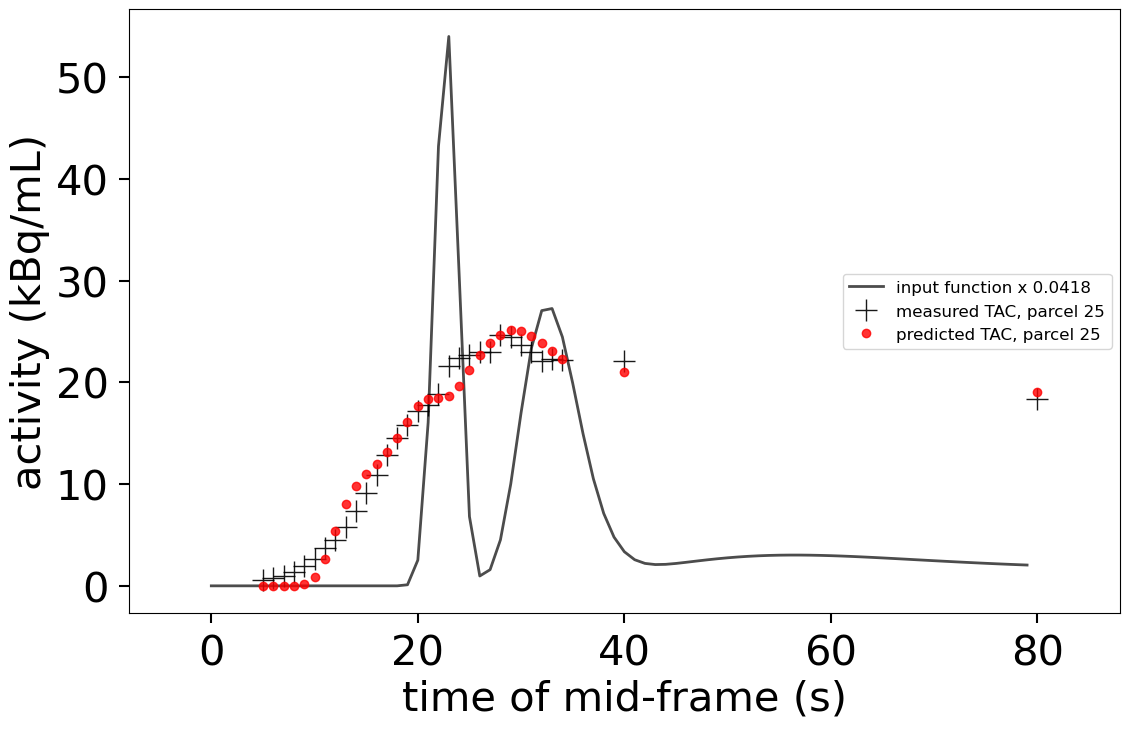

In [13]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_twil.save_results(res_twil, "playground-for-M1984M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_twil.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

## Inspect Mintun1984Model idif

In [14]:
v = mm_idif.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_idif.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.412, 0.978, 0.978, 14.834, -11, 0.025]
'==================================== data ===================================='
{'delta_time': 1,
 'halflife': 122.2416,
 'inputFuncInterp': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.27305037e-03, 1.54036544e-01, 7.43827534e-01, 2.13490425e+00,
       4.65156400e+00, 8.53823013e+00, 1.32431541e+01, 1.66469303e+01,
       1.67560262e+01, 1.52122708e+01, 1.48161127e+01, 1.45070951e+01,
       1.24176066e+01, 9.33598626e+00, 6.98686362e+00, 6.16012514e+00,
       6.40092729e+00, 6.85399683e+00, 6.99034608e+00, 6.67884397e+00,
       5.99506641e+00, 5.08650992e+00, 4.10772058e+00, 3.18491208e+00,
       2.39913305e+00, 1.78524278e+00, 1.34158797e+00, 1.04404181e+00,
       8.59224097e-01, 7.54042018e-01, 7.00912313e-01, 6.79457440e-01,
       6.76003308e-01, 6.

In [15]:
pprint("============================== mm_idif.data2t(data) ===============================")
pprint(BaseIO.data2t(data))
pprint("============================= mm_idif.data2taus(data) =============================")
pprint(BaseIO.data2taus(data))
pprint("=========================== mm_idif.data2timesMid(data) ===========================")
pprint(BaseIO.data2timesMid(data))
pprint("================================== mm_idif.fqfp ===================================")
pprint(mm_idif.fqfp)
# pprint("========================== mm_idif.input_function() =========================")
# pprint(mm_idif.input_function())
pprint("================================= mm_idif.labels ==================================")
pprint(mm_idif.labels)
pprint("====================== mm_idif.load_nii(mm_idif.fqfp + '.nii.gz') ======================")
pprint(mm_idif.load_nii(mm_idif.fqfp + ".nii.gz"))
pprint("=============================== mm_idif.loglike(v) ================================")
pprint(mm_idif.loglike(v))
pprint("================================== mm_idif.ndim ===================================")
pprint(mm_idif.ndim)
pprint("========================= mm_idif.parse_halflife(mm_idif.fqfp) =========================")
pprint(mm_idif.parse_halflife(mm_idif.fqfp))
pprint("========================= mm_idif.parse_isotope(mm_idif.fqfp) ==========================")
pprint(mm_idif.parse_isotope(mm_idif.fqfp))
pprint("================================== mm_idif.sigma ==================================")
pprint(mm_idif.sigma)
pprint("============================ mm_idif.signalmodel(data) ============================")
pprint(mm_idif.signalmodel(data))

('============================== mm_idif.data2t(data) '
 '===============================')
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 70.])
('============================= mm_idif.data2taus(data) '
 '=============================')
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 20., 20.])
('=========================== mm_idif.data2timesMid(data) '
 '===========================')
array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 40., 80.])
('================================== mm_idif.fqfp '
 '===================================')
'/Users/jjlee/PycharmProjects/dynesty/idif2024/data/ses-20210421150523/pet/sub-108293_

## Plot Mintun1984Model idif

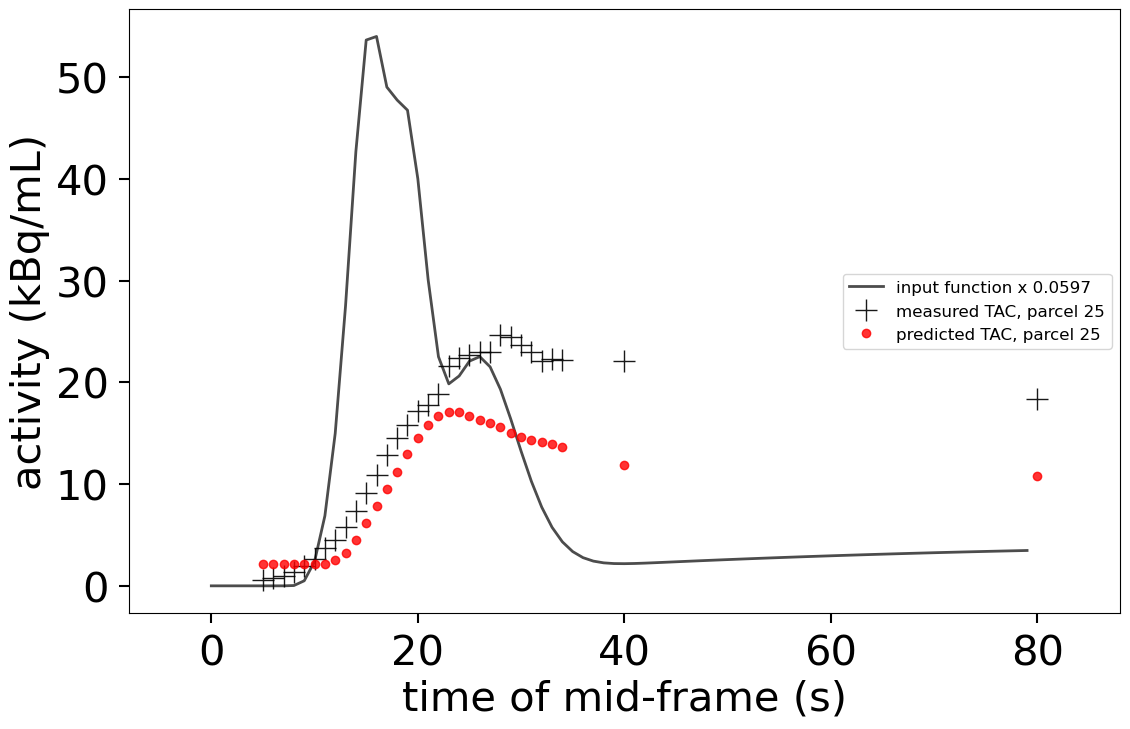

In [16]:
mm_idif.plot_truths(parc_index=parc_index)

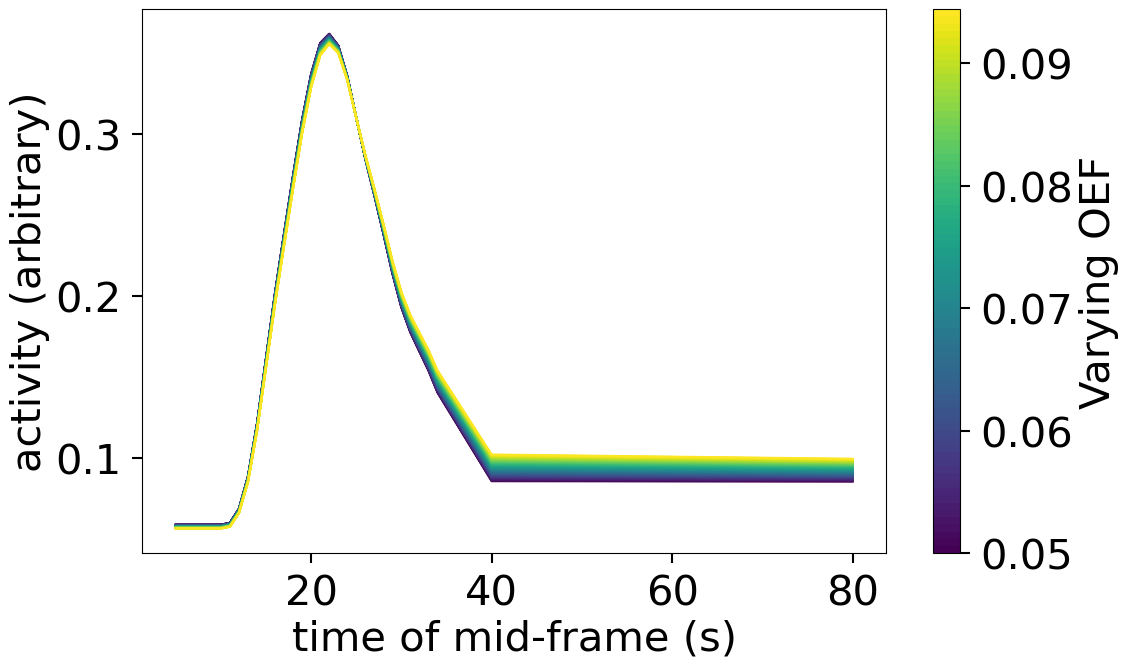

In [17]:
mm_idif.plot_variations(0, 0.05, 0.095 , mm_idif.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 13396 | batch: 16 | bound: 11 | nc: 1 | ncall: 616310 | eff(%):  2.157 | loglstar: 53.488 < 59.085 < 57.233 | logz: 42.892 +/-  0.138 | stop:  0.962                                            

Parameter 0: 0.362933 [0.301094, 0.419906]
Parameter 1: 1.352356 [0.302115, 1.865118]
Parameter 2: 0.979527 [0.880703, 0.999228]
Parameter 3: 15.940145 [8.774941, 17.237758]
Parameter 4: -10.901850 [-11.475623, -4.370960]
Parameter 5: 0.042846 [0.033178, 0.059144]
Parameter 0: 0.362933 [0.301094, 0.419906]
Parameter 1: 1.352356 [0.302115, 1.865118]
Parameter 2: 0.979527 [0.880703, 0.999228]
Parameter 3: 15.940145 [8.774941, 17.237758]
Parameter 4: -10.901850 [-11.475623, -4.370960]
Parameter 5: 0.042846 [0.033178, 0.059144]


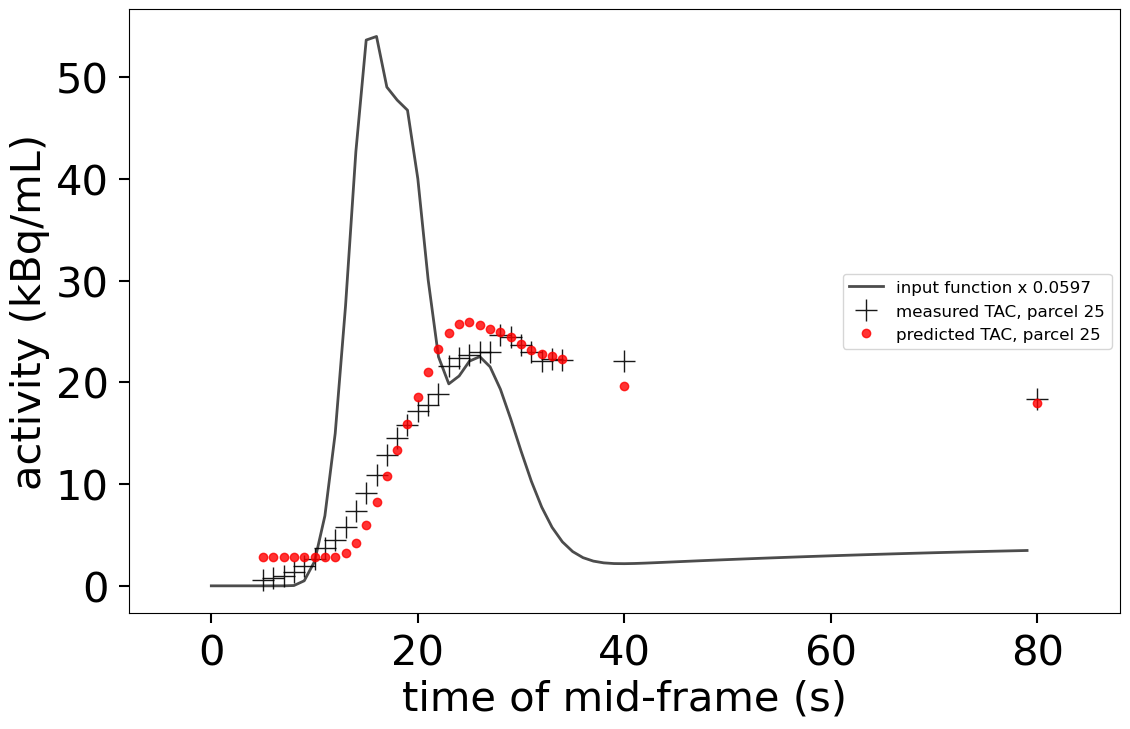

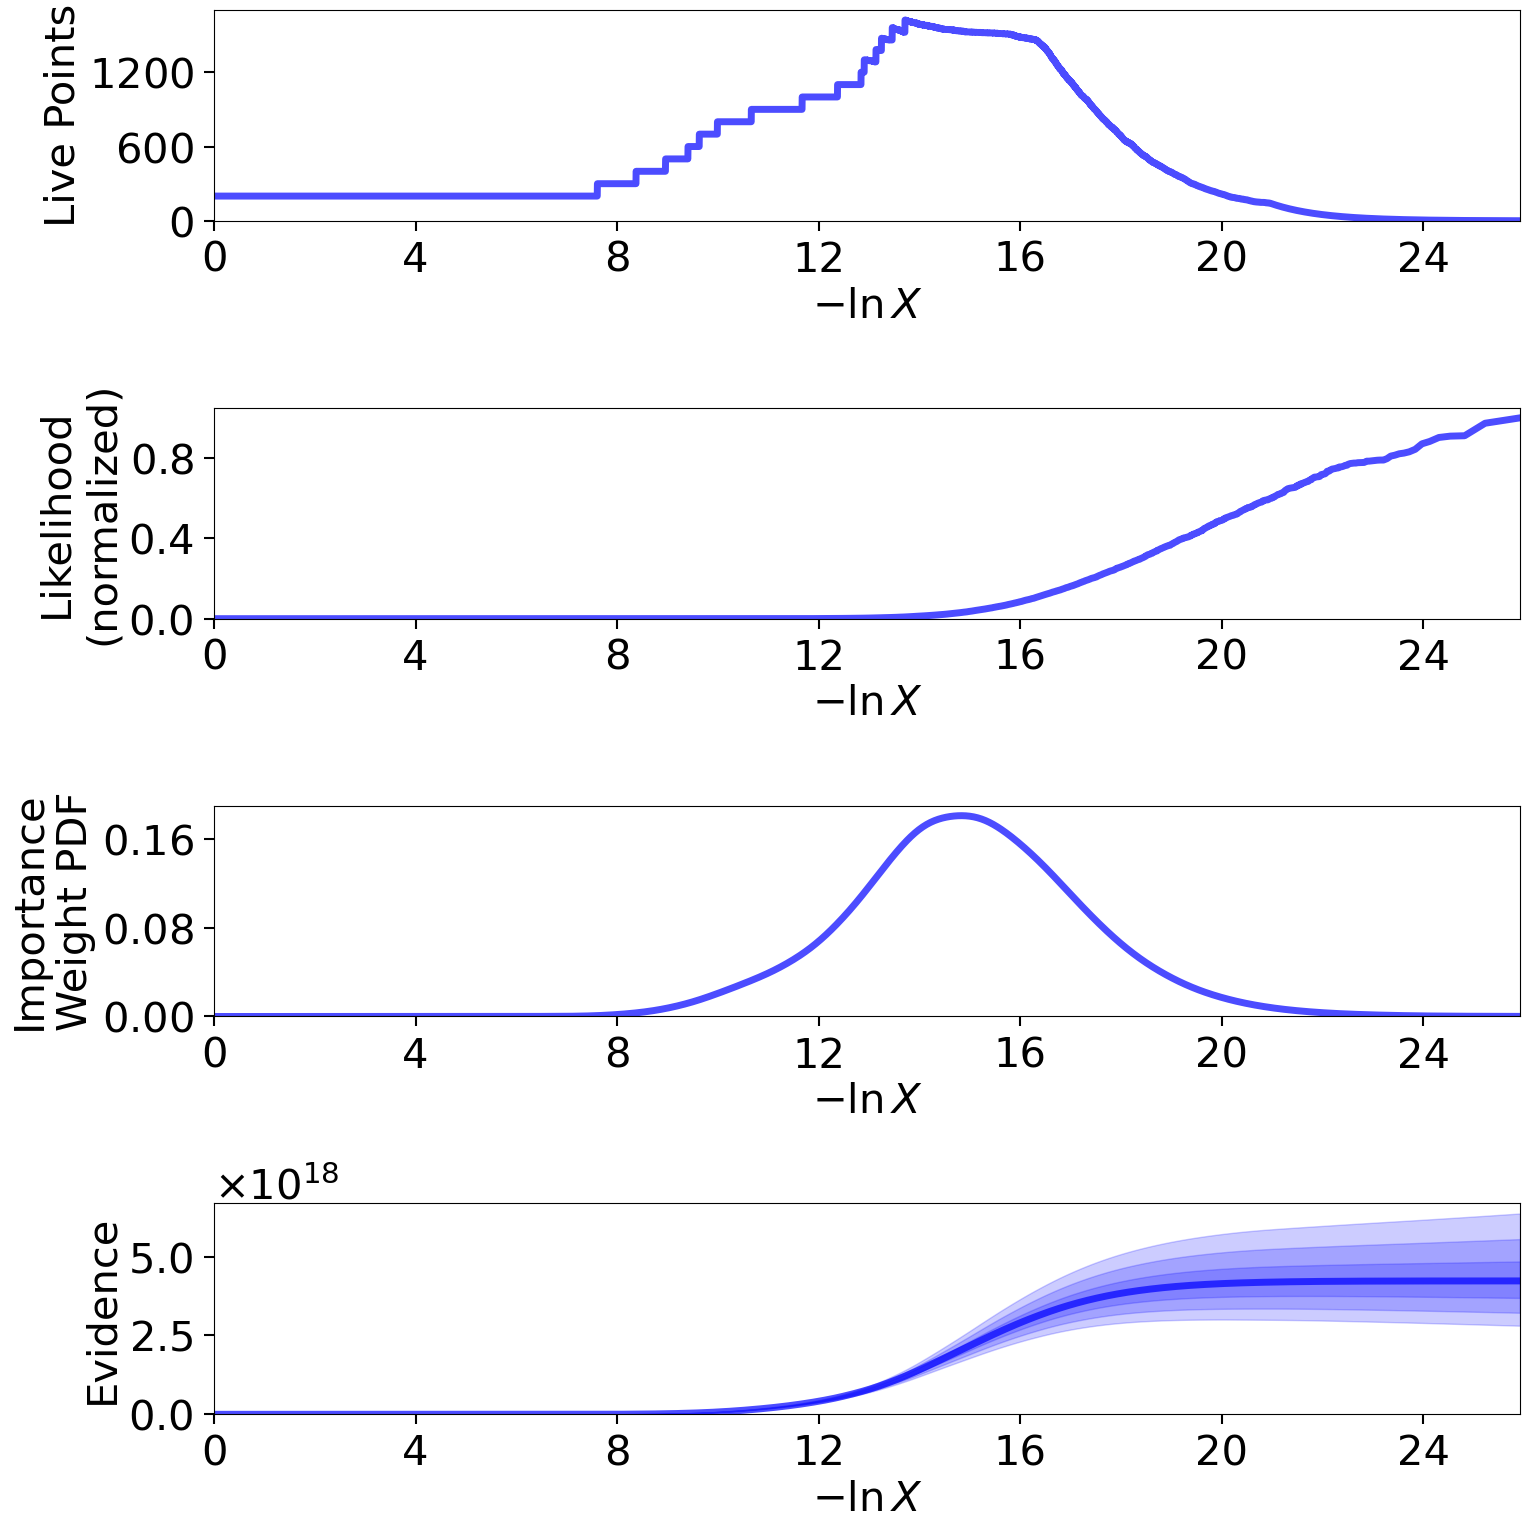

In [18]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_idif.save_results(res_idif, "playground-for-M1984M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_idif.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results